<a href="https://colab.research.google.com/github/Baroka-wp/dive_ML/blob/master/Sprint7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import random
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [81]:
#sample data
np.random.seed(30)
X,_ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
X.shape

(100, 2)

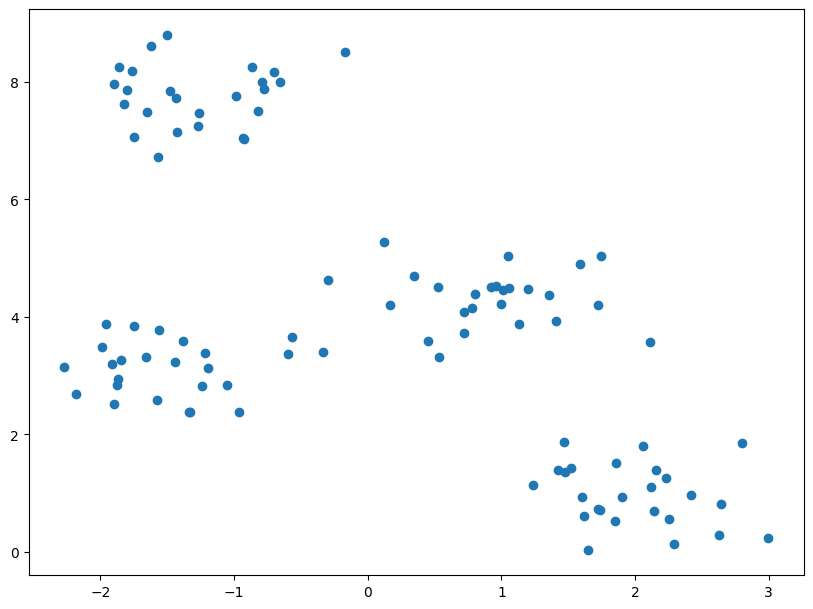

In [82]:
# visualiser les donnees
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.scatter(X[:, 0], X[:, 1]);

## [Problem 1] Determine the initial value of the center point

In [83]:
#initialise random centroid
K = 4
n_samples, n_features = X.shape
def initialize_random_centroid(X):
  centroids = np.zeros((K,n_features))

  for k in range(K):
    centroid = X[np.random.choice(range(n_samples))]
    centroids[k] = centroid

  return centroids

In [84]:
centroids = initialize_random_centroid(X)
centroids

array([[ 1.85367905,  1.5088862 ],
       [ 1.85367905,  1.5088862 ],
       [-1.86097353,  8.2576415 ],
       [-1.86097353,  8.2576415 ]])

## [Problem 2] Creation of a function to obtain SSE

## [Problem 3] Allocation to cluster


In [51]:
#create clusters

def create_clusters(X, centroids):
  clusters = [[] for _ in range(K)]
  for point_idx,point in enumerate(X):
    #calculates the sum of squared errors (SSE)
    sse = np.sqrt(np.sum((point-centroids)**2, axis=1))
    # determinate closet centroids
    closet_centroid = np.argmin(sse)
    #append  closet_centroid in clusters
    clusters[closet_centroid].append(point_idx)

  return clusters

## [Problem 4] Movement of the center point


In [52]:
# calculate new centroid

def calculate_new_centroid(clusters, X):
  centroids = np.zeros((K,n_features))
  for idx,cluster in enumerate(clusters):
    new_centroid = np.mean(X[cluster], axis=0)
    centroids[idx] = new_centroid

  return centroids

In [53]:
# predict cluster

def predict_cluster(clusters, X):
  y_pred = np.zeros(n_samples)

  for cluster_idx, cluster in enumerate(clusters):
    for sample_idx in cluster:
      y_pred[sample_idx] = cluster_idx

  return y_pred


In [54]:
## ploting
def plot_fig(X,y):
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Spectral)
  plt.show()


## [Problem 5] Repeat

## K-means scratch


In [85]:
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_iter, verbose=True):
        # Record hyperparameters as attributes
        self.K = n_clusters
        self.n_iter = n_iter
        self.verbose = verbose
        self.n_samples, self.n_features = X.shape

    def fit(self,X):
      centroids = self._initialize_random_centroid(X)

      for it in range(self.n_iter):
        clusters = self._create_clusters(X, centroids)

        prev_centroids = centroids
        centroids = self._calculate_new_centroid(clusters,X)

        diff = centroids - prev_centroids

      y_pred = self.predict_cluster(clusters, X)

      if self.verbose:
        self._plot_fig(X,y_pred,centroids)

      return y_pred


    def _initialize_random_centroid(self, X):
      centroids = np.zeros((self.K,self.n_features))

      for k in range(self.K):
        centroid = X[np.random.choice(range(self.n_samples))]
        centroids[k] = centroid

      return centroids

    def _create_clusters(self, X, centroids):
      clusters = [[] for _ in range(self.K)]

      for point_idx,point in enumerate(X):
        #calculates the sum of squared errors (SSE)
        closet_centroid = np.argmin(np.sqrt(np.sum((point-centroids)**2, axis=1)))
        # determinate closet centroids
  
        clusters[closet_centroid].append(point_idx)

      return clusters


    def _calculate_new_centroid(self,clusters, X):
      centroids = np.zeros((K,n_features))
      for idx,cluster in enumerate(clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[idx] = new_centroid

      return centroids

    
    def predict_cluster(self,clusters, X):
      y_pred = np.zeros(n_samples)

      for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
          y_pred[sample_idx] = cluster_idx

      return y_pred

    def _plot_fig(self,X,y,centroids):
      plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Spectral)

      for point in centroids:
            plt.scatter(*point, marker="x", color='black', linewidth=2)
      plt.show()

## [Problem 7] Estimate

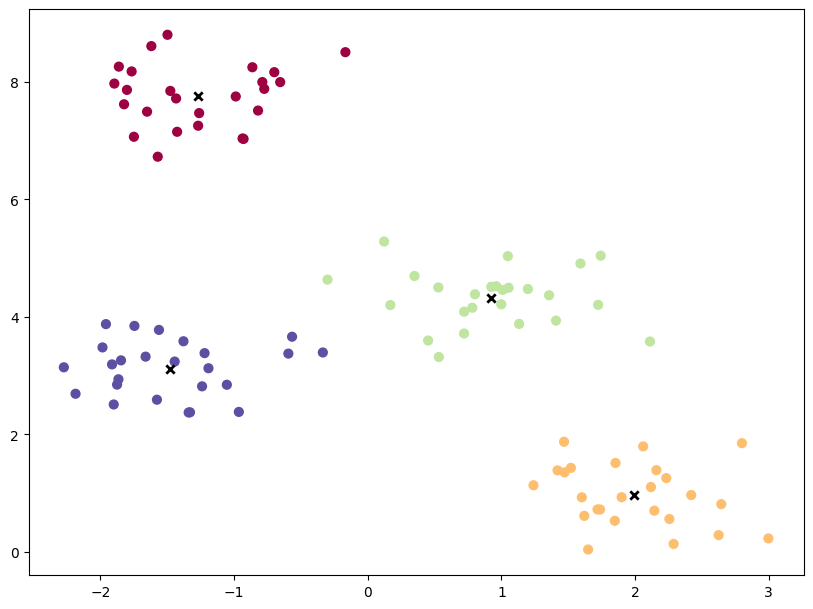

In [86]:
# cumputing 
K_means = ScratchKMeans(n_clusters=4, n_iter=1000)
y_pred = K_means.fit(X)

## [Problem 8] Implementation of elbow method


In [94]:
def eucledian_distance(x1,x2):
  distance = np.sqrt(np.sum((x1-x2)**2))
  return np.sqrt(np.sum((x1-x2)**2))

# class of K-means cluster
class ScratchKMeans2():
    def __init__(self, k=5, max_iters=100, verbose=False):
        self.k = k
        self.max_iters = max_iters
        self.verbose = verbose
        self.sse = []
        
        # initializing an empty list of sample indeces for each cluster
        self.clusters = [[] for _ in range(self.k)]
        
        # a list to store the mean of feature vector 
        self.centroids = []
        
    def fit(self, X):
        if self.verbose:
            print()
        return
    
    def fit_predict(self,X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize the centroids
        random_samples_idxs = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[idx] for idx in random_samples_idxs]
        
        # optimization
        for _ in range(self.max_iters):
            # update cluster
            self.clusters = self._create_clusters(self.centroids)
            
            # update centroids
            # store old centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            # check for if the centroids are not changing anymore(and stop)
            if self._is_converged(centroids_old, self.centroids):
              # calculating the sse
              for i,cluster in enumerate(self.clusters):
                for sample_idx in cluster:
                  self.sse.append(eucledian_distance(X[sample_idx],self.centroids[i]))
              break
        return self._get_cluster_labels(self.clusters)
    
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.X):
            # getting closest centroids index
            centroids_idx = self._closest_centroid(sample, centroids)
            clusters[centroids_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        # calc distance of all samples to the centroids
        distances = [eucledian_distance(sample,point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self,clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self, centroids_old, centroids):
        distances = [eucledian_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0
    
    def _get_cluster_labels(self,clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx,cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()

## Wholesaler data analysis


In [95]:
data = pd.read_csv("/content/sample_data/Wholesale customers data.csv")
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

In [89]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


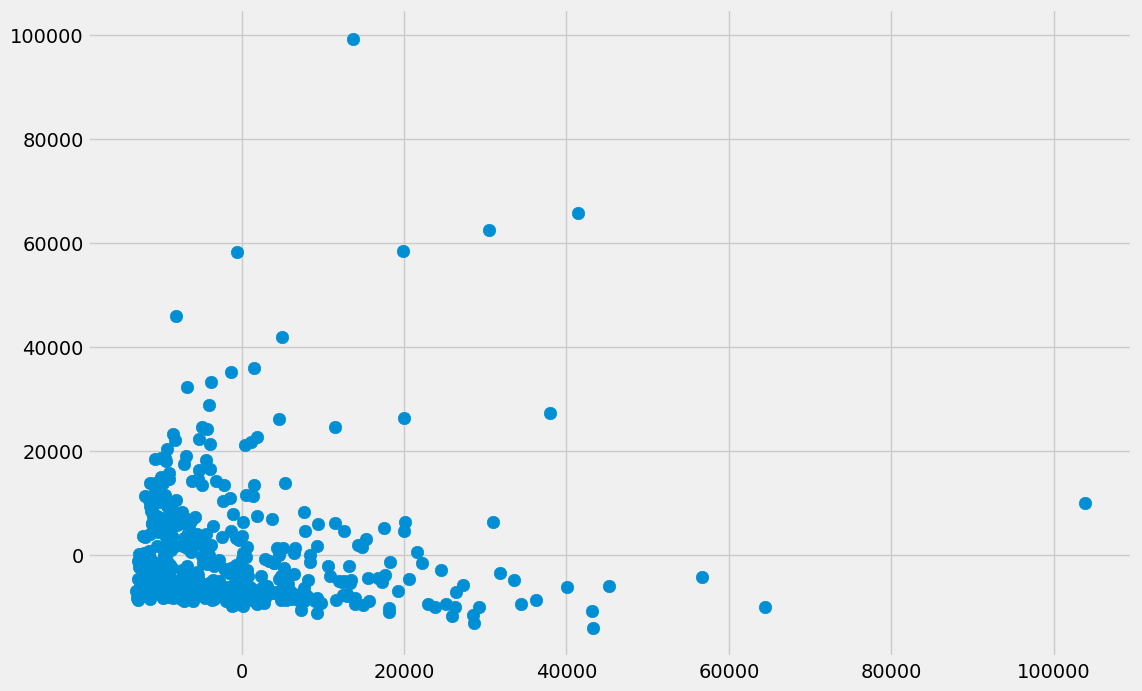

In [104]:
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(data_pca[:,0],data_pca[:,1],s=80);

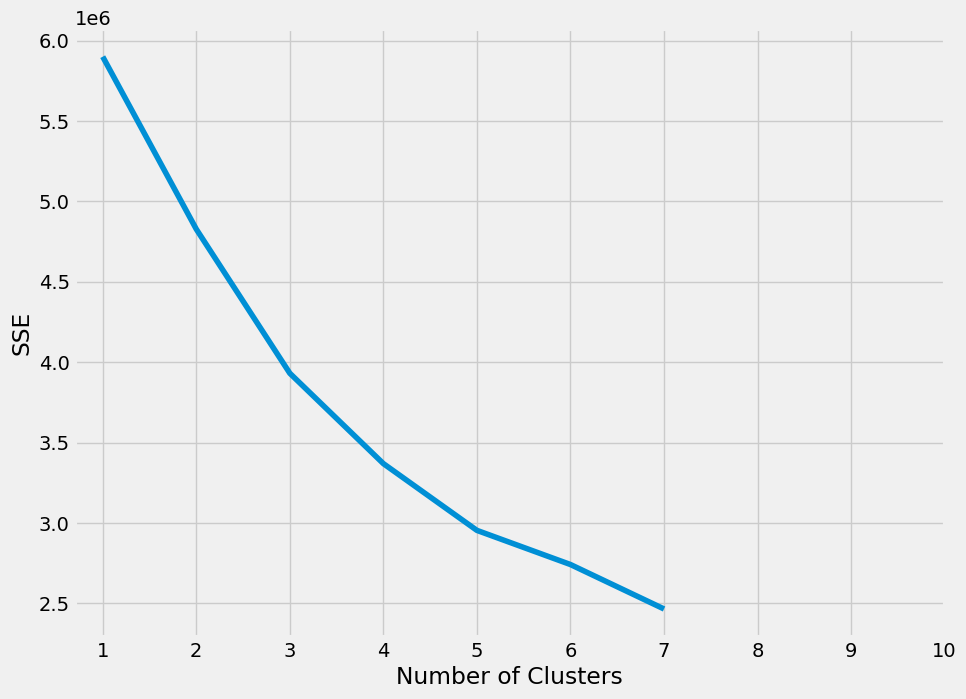

In [98]:
SSE = []
for k in range(1, 8):
  kmeans = ScratchKMeans2(k, max_iters=150, verbose=True)
  y_pred3 = kmeans.fit_predict(data_pca)
  SSE.append(sum(kmeans.sse))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 8), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


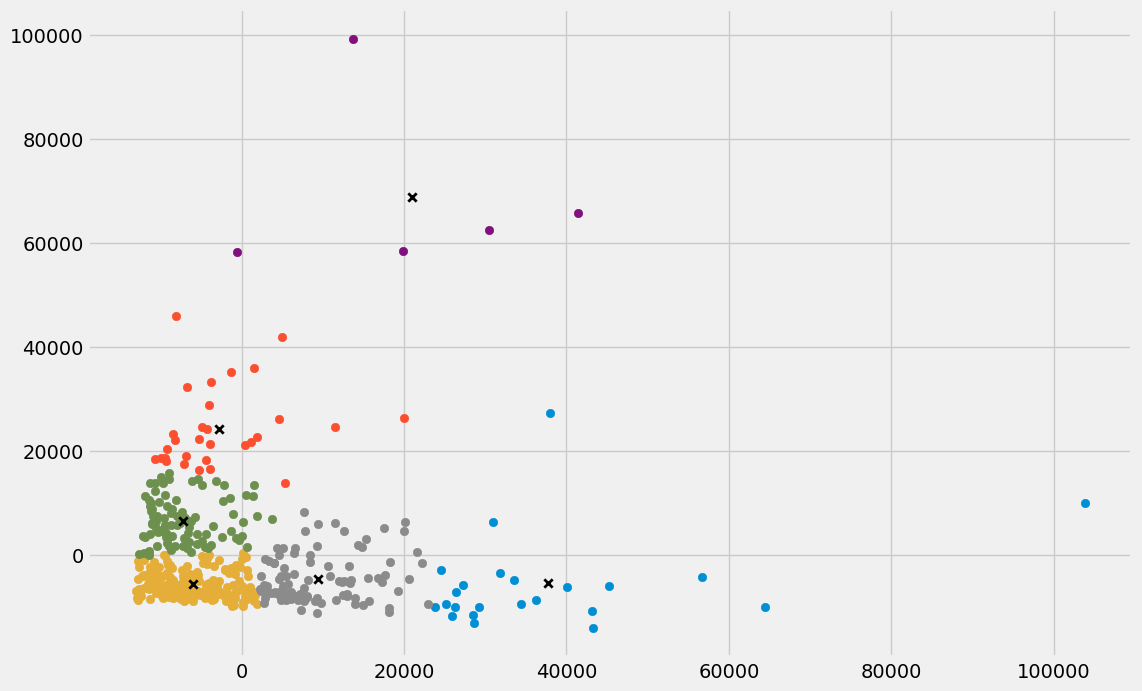

In [100]:
kmean_6 = ScratchKMeans(k=6, max_iters=150, verbose=True)
y_predict = kmean_6.fit_predict(data_pca)
kmean_6.plot()

## [Problem 11] Comparison with known groups


In [106]:
# add clusters to the dataset
data['clusters'] = y_predict[:,]
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,3.0
1,2,3,7057,9810,9568,1762,3293,1776,3.0
2,2,3,6353,8808,7684,2405,3516,7844,3.0
3,1,3,13265,1196,4221,6404,507,1788,2.0
4,2,3,22615,5410,7198,3915,1777,5185,4.0


In [108]:
data.groupby(['Channel','Region']).count()


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
Channel Region                                                               
1       1          59    59       59      59                59          59   
        2          28    28       28      28                28          28   
        3         211   211      211     211               211         211   
2       1          18    18       18      18                18          18   
        2          19    19       19      19                19          19   
        3         105   105      105     105               105         105   

                clusters  
Channel Region            
1       1             59  
        2             28  
        3            211  
2       1             18  
        2             19  
        3            105

Les résultats obtenus en utilisant la méthode de clustering peuvent différer des résultats obtenus en utilisant la catégorisation évidente.

## [Problem 12] Useful information for wholesalers


In [109]:
data.groupby(['clusters']).count()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
clusters,,,,,,,,
0.0,23,23,23,23,23,23,23,23
1.0,30,30,30,30,30,30,30,30
2.0,190,190,190,190,190,190,190,190
3.0,93,93,93,93,93,93,93,93
4.0,99,99,99,99,99,99,99,99
5.0,5,5,5,5,5,5,5,5


## [Problem 13] (Advance assignment) Investigation of other methods


### **Avantages de DBSCAN**

DBSCAN ne nécessite pas de spécifier le nombre de clusters dans les données a priori, contrairement à k-means. DBSCAN peut trouver des clusters de forme arbitraire. Il peut même trouver un cluster complètement entouré d'un autre cluster.


**Inconvénients de DBSCAN**
les points limites atteignables à partir de plus d'un cluster peuvent faire partie de l'un ou l'autre cluster, selon l'ordre de traitement des données.

**Avantages de t-SNE**

maintien des distances locales des données

**Inconvénients de t-SNE**

L'algorithme t-SNE est lent en raison des requêtes de recherche du plus proche voisin.


## [Problem 14] (Advance assignment) Use of t-SNE and DBSCAN


In [110]:
X_embedded = TSNE(n_components=2).fit_transform(X)
clustering = DBSCAN(eps=3, min_samples=2).fit_predict(X_embedded)
clustering

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])